# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is an unsupervised learning method that is often used to reduce the dimensionality of a dataset. It transforms a large set of variables into a lower-dimensional set while retaining most of the important information.

PCA finds a new set of dimensions such that all dimensions are orthogonal (and hence linearly independent) and ranked according to the variance of data along them.

## Objectives of PCA
PCA aims to find a transformation such that:

1. The transformed features are linearly independent.
2. Dimensionality can be reduced by selecting only the dimensions with the highest importance.
3. The newly found dimensions minimize the projection error.
4. The projected points have maximum spread, i.e., maximum variance.

## Mathematical Concepts

### Variance
Variance measures how much the data points deviate from the mean.

$$
Var(X) = \frac{1}{n} \sum_{i=1}^{n} (X_i - \mu)^2
$$

where \( \mu \) is the mean of the dataset.

### Covariance Matrix
Covariance measures the relationship between two variables. The covariance between two variables \( X \) and \( Y \) is given by:

$$
Cov(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (X_i - \mu_X)(Y_i - \mu_Y)
$$

where \( \mu_X \) and \( \mu_Y \) are the means of \( X \) and \( Y \), respectively.

The covariance matrix \( C \) for a dataset with multiple variables is:

$$
C = \begin{bmatrix} 
Cov(X_1, X_1) & Cov(X_1, X_2) & \dots & Cov(X_1, X_n) \\
Cov(X_2, X_1) & Cov(X_2, X_2) & \dots & Cov(X_2, X_n) \\
\vdots & \vdots & \ddots & \vdots \\
Cov(X_n, X_1) & Cov(X_n, X_2) & \dots & Cov(X_n, X_n) 
\end{bmatrix}
$$

### Eigenvectors and Eigenvalues
Eigenvectors and eigenvalues are used to determine the principal components.

- **Eigenvectors** define the directions of the new feature space.
- **Eigenvalues** define the magnitude (importance) of each eigenvector.

If \( C \) is the covariance matrix, then eigenvalues \( \lambda \) and eigenvectors \( v \) satisfy the equation:

$$
C v = \lambda v
$$

The eigenvectors corresponding to the largest eigenvalues form the principal components, which represent the most significant variance in the dataset.

## Steps to Perform PCA
1. Standardize the dataset (mean = 0, variance = 1).
2. Compute the covariance matrix.
3. Calculate the eigenvectors and eigenvalues.
4. Sort eigenvectors by descending eigenvalues.
5. Select the top \( k \) eigenvectors to form a new feature subspace.
6. Project the original dataset onto the new subspace.

PCA is widely used in data analysis, image compression, and machine learning for feature reduction while preserving meaningful information.

In [2]:
import numpy as np

In [15]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None


    def fit(self, X):
        # mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # covariance | functions needs samples as columns
        cov = np.cov(X.T)

        # eigenvectors, eigenvalues
        eigenvectors, eigenvalues = np.linalg.eig(cov)

        # transpose for easier calculations | eigenvectors v = [:, i] column vector
        eigenvectors = eigenvectors.T

        # sort eigenvectors
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.components = eigenvectors[:self.n_components]


    def transform(self, X):
        #project the data
        X = X - self.mean
        return np.dot(X, self.components.T)

In [6]:
# Test
import matplotlib.pyplot as plt
from sklearn import datasets

In [12]:
data = datasets.load_iris()
X = data.data
y = data.target

In [ ]:
pca = PCA(2) # 2 dimensions
pca.fit(X)
X_projected = pca.transform(X)

print(X.shape)
print(X_projected.shape)

(150, 4)
(150, 2)


/var/folders/jv/spcb9wcj31s31hbm46rppbsr0000gq/T/ipykernel_22005/1763852669.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis",3))


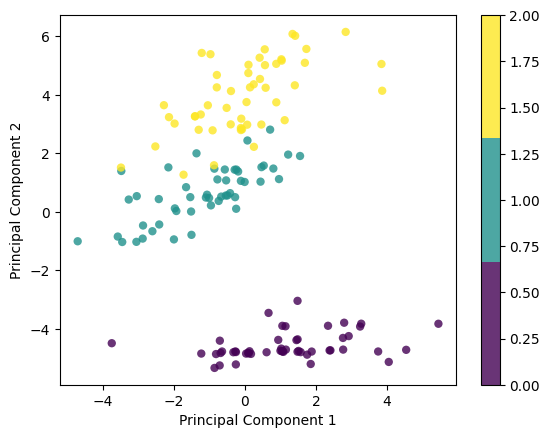

In [22]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis",3))
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()